# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sabrina Sekar Ranti
- **Email:** rantisabrina24@gmail.com
- **ID Dicoding:** sabrinarantii

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penyewaan sepeda dari tahun 2011 hingga 2012?
- Pertanyaan 2 : Apakah cuaca memengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3 : Apakah ada perbedaan tren penyewaan sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Cek informasi Data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan pada tipe data variabel dteday. Tipe data variabel tersebut seharusnya datetime

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan pada tipe data variabel dteday. Tipe data variabel tersebut seharusnya datetime

**Cek Missing Value Data**

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data tersebut

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data tersebut

**Cek Duplikasi Data**

In [ ]:
print("Jumlah duplikasi data Day:", day_df.duplicated().sum())

Jumlah duplikasi data Day: 0


In [ ]:
print("Jumlah duplikasi data Hour:", hour_df.duplicated().sum())

Jumlah duplikasi data Hour: 0


**Cek Statistik Data**

In [ ]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [ ]:
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

Mengatasi Info Data Day yang Tidak Sesuai

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Cek Info Data Day

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengatasi Info Data Hour yang Tidak Sesuai

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Cek Info Data Hour

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Menggabungkan 2 data berdasarkan variabel dteday

In [ ]:
merge_data = pd.concat([day_df.set_index('dteday'), hour_df.set_index('dteday')], axis=1)

In [ ]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  instant     17379 non-null  int64  
 16  season      17379 non-null  int64  
 17  yr          17379 non-null  int64  
 18  mnth        17379 non-null  int64  
 19  hr      

Mengunduh file gabungan data set

In [ ]:
merge_data.to_csv('merge_data.csv')

## Visualization & Explanatory Analysis

In [ ]:
#Inisiasi variabel merge_data
md = pd.read_csv("merge_data.csv")
md['dteday'] = pd.to_datetime(md['dteday'])
md.set_index('dteday', inplace=True)

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dari tahun 2011 hingga 2012?

In [ ]:
#Menghitung total penyewaan sepeda di tahun 2011 dan 2012
total_rentals_2011 = md[md['yr'] == 0]['cnt'].sum()
total_rentals_2012 = md[md['yr'] == 1]['cnt'].sum()
print("Total penyewaan pada tahun 2011:", total_rentals_2011)
print("Total penyewaan pada tahun 2012:", total_rentals_2012)

Total penyewaan pada tahun 2011: 29665268
Total penyewaan pada tahun 2012: 49125782


Dari hasil diatas didapatkan penyewaan sepeda meningkat dari tahun 2011 ke tahun 2012

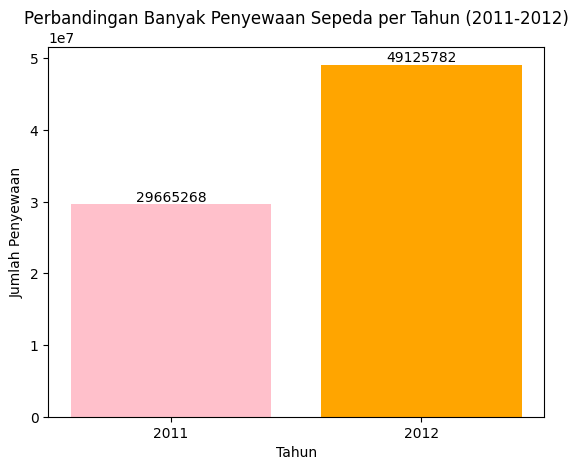

In [ ]:
#Visualisasi
year = ['2011', '2012']
total_rentals = [total_rentals_2011, total_rentals_2012]
plt.bar(year, total_rentals, color=['pink', 'orange'])

for i in range(len(year)):
    plt.text(year[i], total_rentals[i] + 1000, str(total_rentals[i]), ha='center', va='bottom')


plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.title('Perbandingan Banyak Penyewaan Sepeda per Tahun (2011-2012)')
plt.show()

### Pertanyaan 2: Apakah cuaca memengaruhi jumlah penyewaan sepeda?

In [ ]:
#Menghitung rata-rata jumlah penyewaan sepeda untuk setiap nilai weathersit
average_rentals_by_weather = md.groupby('weathersit')['cnt'].mean()
print(average_rentals_by_weather)

weathersit
1    4895.177083
2    4062.717595
3    1914.700855
Name: cnt, dtype: float64


Hasil tersebut menunjukkan rata-rata penyewaan sepeda di tiap cuacanya

* 1 = Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
* 2 = Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
* 3 = Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
* 4 = Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

Dan dapat diketahui pada cuaca 4 tidak ada yang melakukan penyewaan sepeda



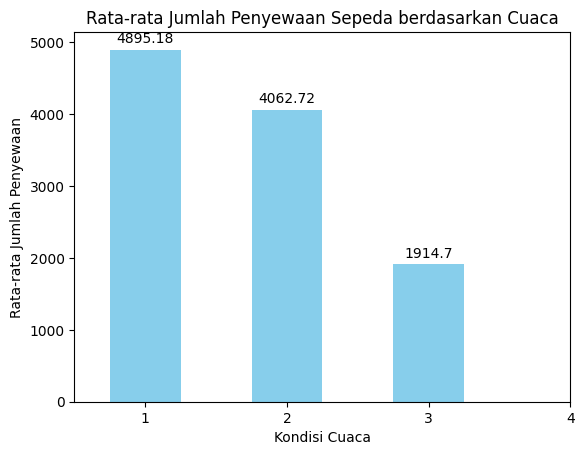

In [ ]:
# Visualisasi
ax = average_rentals_by_weather.plot(kind='bar', color='skyblue')

for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 50, str(round(i.get_height(), 2)), ha='center', va='bottom')

plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(4), ['1', '2', '3', '4'], rotation=0)
plt.show()

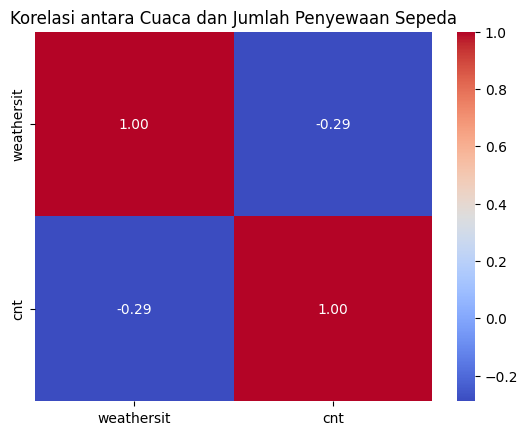

Korelasi antara cuaca dan jumlah penyewaan sepeda: -0.2896496187483933


In [ ]:
#Visualisasi
correlation = md['weathersit'].corr(md['cnt'])
sns.heatmap(md[['weathersit', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()
print("Korelasi antara cuaca dan jumlah penyewaan sepeda:", correlation)

Dari hasil hitung korelasi tersebut, hubungan antar keduanya lemah dan negatif. Hal ini mengartikan cuaca tidak memengaruhi secara langsung dalam perubahan jumlah penyewaan sepeda dan memungkinkan adanya variabel lain yang juga memengaruhi

### Pertanyaan 3: Apakah ada perbedaan tren penyewaan sepeda antara musim semi, musim panas, musim gugur, dan musim dingin?

In [ ]:
#Memsiahkan data ke dalam kelompok musim
spring_data = md[md['season'] == 1]
summer_data = md[md['season'] == 2]
fall_data = md[md['season'] == 3]
winter_data = md[md['season'] == 4]

#Menganalisis tren untuk setiap musim
trends = {
    'Spring': spring_data.resample('M').sum()['cnt'],
    'Summer': summer_data.resample('M').sum()['cnt'],
    'Fall': fall_data.resample('M').sum()['cnt'],
    'Winter': winter_data.resample('M').sum()['cnt']
}

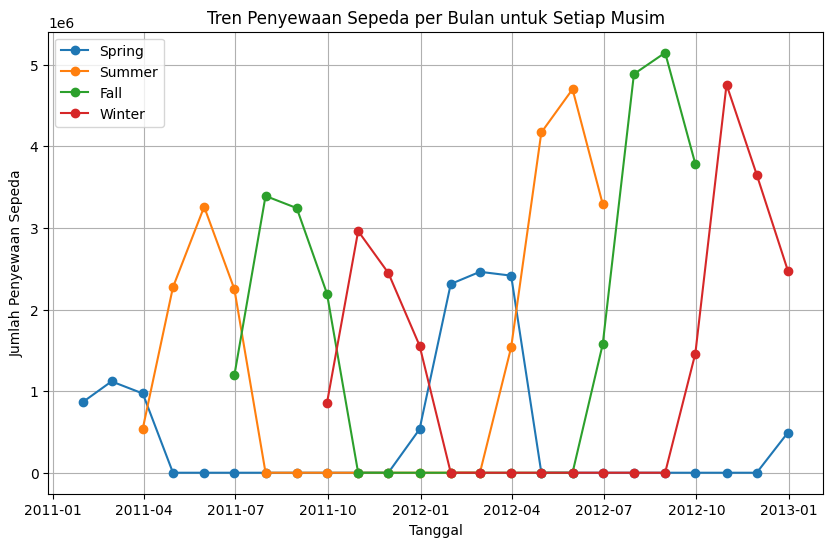

In [ ]:
#Visualisasi
plt.figure(figsize=(10, 6))
for season, trend in trends.items():
    plt.plot(trend.index, trend, marker='o', label=season)

plt.title('Tren Penyewaan Sepeda per Bulan untuk Setiap Musim')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1

  Trend penyewaan sepeda mengalami peningkatan dari tahun 2011 ke tahun 2012. Peningkatan penyewaan yang didapatkan juga cukup besar, hampir mencapai 2x lipatnya.

- Conclution pertanyaan 2
  
  Tidak. Dari hasil korelasi, cuaca tidak memengaruhi jumlah penyewaan secara signifikan. Kemungkinan besar terdapat pengaruh dari variabel-variabel yang lain

- Conclution pertanyaan 3
  
  Tren penyewaan sepeda pada tiap musim mengalami persamaan. Pada 2 tahun tersebut jumlah penyewaan tertinggi sama-sama di bulan 8 di musim gugur dan dari keseluruhan penyewaan tertinggi juga terdapat di musim gugur